In [1]:
# Make relevant plots of:
#  - Policies (as histogram)
#  - Policies (as bar chart)
#  - Diff in dose vs observed mortality for diff policies

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [415]:
action_df = pd.read_csv("/Users/tding/cs234/rlsepsis234/data3/action_df.csv")
df_orig = pd.read_csv("/Users/tding/cs234/rlsepsis234/data3/test_state_action_reward_df_no_scale.csv")
df_results = pd.read_csv("/Users/tding/cs234/rlsepsis234/results/final_dqn_offpol/20190317T171114_2k_steps/pred_real_compare20190317T171145")


In [416]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [417]:
#df_results.count()

In [418]:
#df_orig.count()

In [419]:
#df_orig[["subject_id", "hadm_id","icustay_id", "interval_start_time", "interval_end_time", "sofa"]]

In [420]:
data=df_results.join(df_orig[["subject_id", "hadm_id","icustay_id", "interval_start_time", "interval_end_time", "sofa"]], how="left", lsuffix="_left")

In [421]:
def decode (df):
    df['vaso'] = inv_action_map[df.discrete_action][1]
    df['iv']= inv_action_map[int(df.discrete_action)][0]
    return df

In [422]:
data.columns

Index(['Unnamed: 0', 'subject_id_left', 'hadm_id_left', 'icustay_id_left',
       'interval_start_time_left', 'interval_end_time_left', 'sofa_left',
       'iv_pred', 'iv_real', 'vaso_pred', 'vaso_real', 'died', 'subject_id',
       'hadm_id', 'icustay_id', 'interval_start_time', 'interval_end_time',
       'sofa'],
      dtype='object')

(array([11044.,     0.,     0.,     0.,     0.,     0.,  6598.,     0.,
            0.,     0.,     0.,     0.,  6552.,     0.,     0.,     0.,
            0.,     0.,  7943.,     0.,     0.,     0.,     0.,     0.,
         7095.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  ]),
 <a list of 25 Patch objects>)

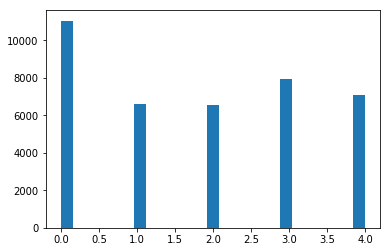

In [423]:
plt.hist(data.iv_pred, bins=25)

(array([9507.,    0.,    0.,    0.,    0.,    0., 7241.,    0.,    0.,
           0.,    0.,    0., 7427.,    0.,    0.,    0.,    0.,    0.,
        7550.,    0.,    0.,    0.,    0.,    0., 7507.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  ]),
 <a list of 25 Patch objects>)

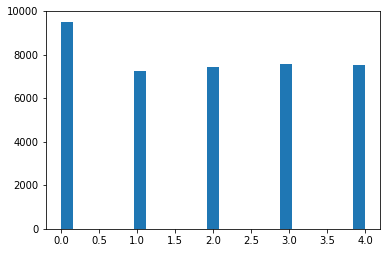

In [424]:
plt.hist(data.iv_real, bins=25)

(array([  502., 11901., 11905.,  7339.,  3880.,  1991.,  1008.,   422.,
          199.,    85.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

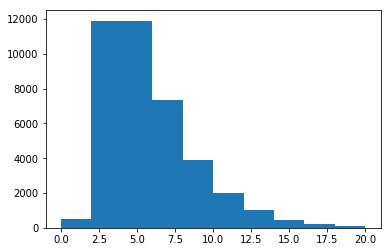

In [425]:
plt.hist(data.sofa)

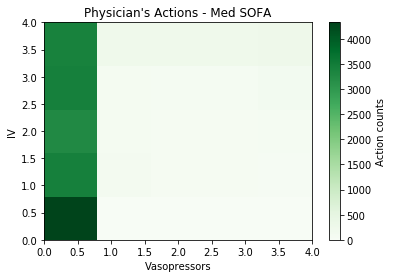

In [426]:
plt.hist2d(med_sofa.vaso_real, med_sofa.iv_real, bins=5, cmap='Greens')
plt.title("Physician's Actions - Med SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

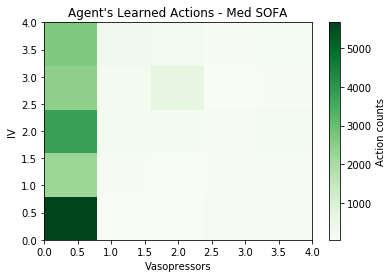

In [427]:
plt.hist2d(med_sofa.vaso_pred, med_sofa.iv_pred, bins=5, cmap='Greens')
plt.title("Agent's Learned Actions - Med SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

In [428]:
low_sofa = data[data['sofa'].between(0, 4, inclusive=True)]

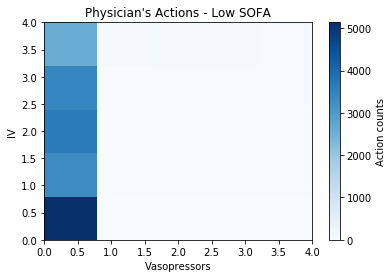

In [429]:
plt.hist2d(low_sofa.vaso_real, low_sofa.iv_real, bins=5, cmap='Blues')
plt.title("Physician's Actions - Low SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

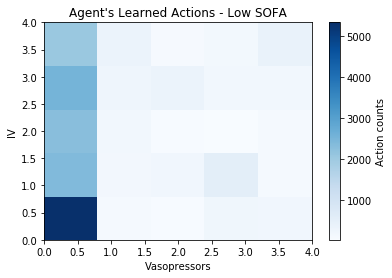

In [430]:
plt.hist2d(low_sofa.vaso_pred, low_sofa.iv_pred, bins=5, cmap='Blues')
plt.title("Agent's Learned Actions - Low SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

In [431]:
high_sofa = data[data['sofa'].between(15, 20, inclusive=True)]

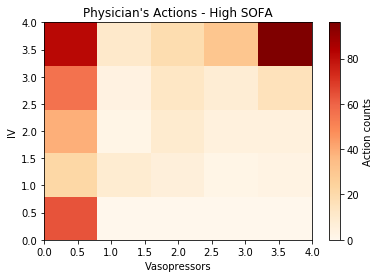

In [432]:
plt.hist2d(high_sofa.vaso_real, high_sofa.iv_real, bins=5, cmap='OrRd')
plt.title("Physician's Actions - High SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

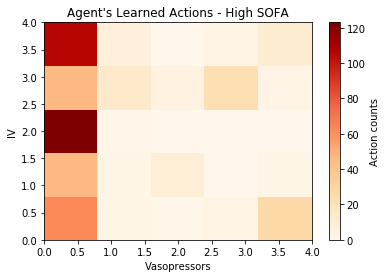

In [433]:
plt.hist2d(high_sofa.vaso_pred, high_sofa.iv_pred, bins=5, cmap='OrRd')
plt.title("Agent's Learned Actions - High SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

Text(0.5, 0, 'Vasopressors')

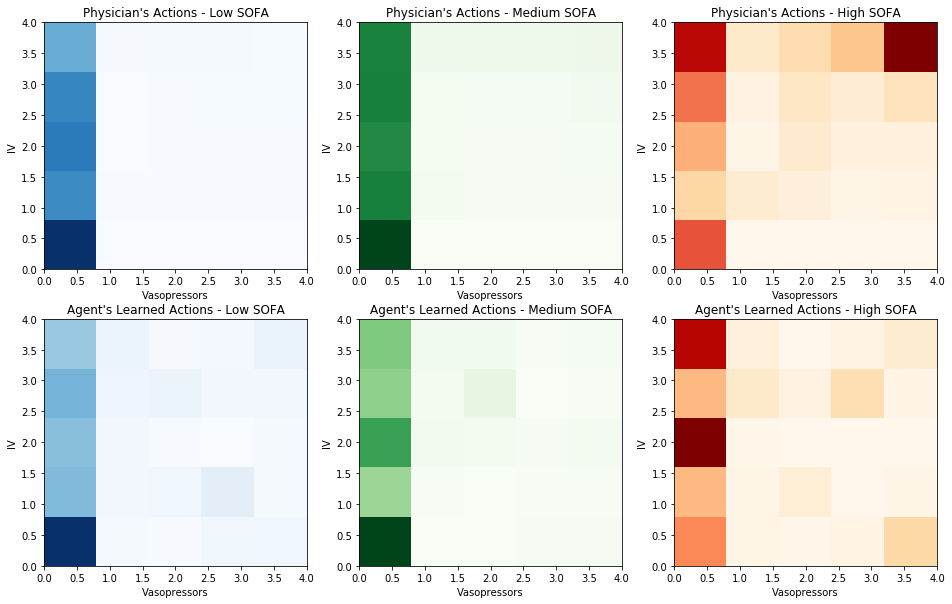

In [434]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16,10))
ax1.hist2d(low_sofa.vaso_real, low_sofa.iv_real, bins=5, cmap='Blues')
ax1.set_title("Physician's Actions - Low SOFA")
ax1.set_ylabel("IV")
ax1.set_xlabel("Vasopressors")
#ax1.colorbar(label = "Action counts")
ax2.hist2d(med_sofa.vaso_real, med_sofa.iv_real, bins=5, cmap='Greens')
ax2.set_title("Physician's Actions - Medium SOFA")
ax2.set_ylabel("IV")
ax2.set_xlabel("Vasopressors")
ax3.hist2d(high_sofa.vaso_real, high_sofa.iv_real, bins=5, cmap='OrRd')
ax3.set_title("Physician's Actions - High SOFA")
ax3.set_ylabel("IV")
ax3.set_xlabel("Vasopressors")
ax4.hist2d(low_sofa.vaso_pred, low_sofa.iv_pred, bins=5, cmap='Blues')
ax4.set_title("Agent's Learned Actions - Low SOFA")
ax4.set_ylabel("IV")
ax4.set_xlabel("Vasopressors")
ax5.hist2d(med_sofa.vaso_pred, med_sofa.iv_pred, bins=5, cmap='Greens')
ax5.set_title("Agent's Learned Actions - Medium SOFA")
ax5.set_ylabel("IV")
ax5.set_xlabel("Vasopressors")
ax6.hist2d(high_sofa.vaso_pred, high_sofa.iv_pred, bins=5, cmap='OrRd')
ax6.set_title("Agent's Learned Actions - High SOFA")
ax6.set_ylabel("IV")
ax6.set_xlabel("Vasopressors")

Text(0.5, 1.0, "Agent's Learned IV Actions")

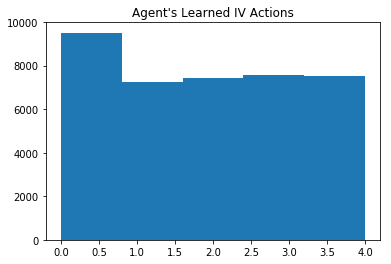

In [435]:
plt.hist(data.iv_real, bins=5)
plt.title("Agent's Learned IV Actions")

Text(0.5, 1.0, 'Vasopressors Agent')

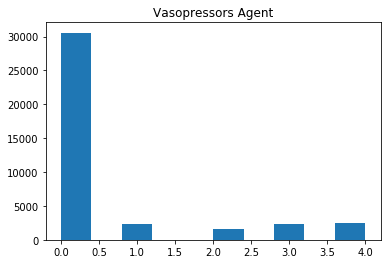

In [436]:
plt.hist(data.vaso_pred, bins=10)
plt.title("Vasopressors Agent")

In [437]:
med_sofa = data[data['sofa'].between(5, 15, inclusive=True)]

In [438]:
med_sofa = med_sofa.fillna(0)

def vaso_diff(df):
    df["vaso_diff"] = df.vaso_pred  - df.vaso_real
    return df

def iv_diff(df):
    df["iv_diff"] = df.iv_pred  - df.iv_real
    return df

In [439]:
med_sofa.head()

,Unnamed: 0,subject_id_left,hadm_id_left,icustay_id_left,interval_start_time_left,interval_end_time_left,sofa_left,iv_pred,iv_real,vaso_pred,vaso_real,died,subject_id,hadm_id,icustay_id,interval_start_time,interval_end_time,sofa
52,52,166,128219,271863,2105-01-23T16:00:00Z,2105-01-23T20:00:00Z,0.872497,0,0,0,0,1,166,128219,271863,2105-01-23T16:00:00Z,2105-01-23T20:00:00Z,8
53,53,166,128219,271863,2105-01-23T20:00:00Z,2105-01-24T00:00:00Z,0.872497,0,0,0,0,1,166,128219,271863,2105-01-23T20:00:00Z,2105-01-24T00:00:00Z,8
54,54,166,128219,271863,2105-01-24T00:00:00Z,2105-01-24T04:00:00Z,0.872497,0,0,0,0,1,166,128219,271863,2105-01-24T00:00:00Z,2105-01-24T04:00:00Z,8
55,55,179,161310,256090,2173-05-28T15:46:00Z,2173-05-28T19:46:00Z,1.533560,4,2,4,0,0,179,161310,256090,2173-05-28T15:46:00Z,2173-05-28T19:46:00Z,10
56,56,179,161310,256090,2173-05-28T19:46:00Z,2173-05-28T23:46:00Z,1.533560,0,2,0,0,0,179,161310,256090,2173-05-28T19:46:00Z,2173-05-28T23:46:00Z,10


In [440]:
med_sofa = med_sofa.apply(vaso_diff,  axis=1)
med_sofa = med_sofa.apply(iv_diff,  axis=1)

In [441]:
med_sofa.count()

Unnamed: 0                  20120
subject_id_left             20120
hadm_id_left                20120
icustay_id_left             20120
interval_start_time_left    20120
interval_end_time_left      20120
sofa_left                   20120
iv_pred                     20120
iv_real                     20120
vaso_pred                   20120
vaso_real                   20120
died                        20120
subject_id                  20120
hadm_id                     20120
icustay_id                  20120
interval_start_time         20120
interval_end_time           20120
sofa                        20120
vaso_diff                   20120
iv_diff                     20120
dtype: int64

In [442]:
def mortality(df):
    return sum(df['died'])/df['died'].count()

med_sofa_vaso = med_sofa.groupby("vaso_diff").apply(mortality)
med_sofa_iv = med_sofa.groupby("iv_diff").apply(mortality)

In [443]:
med_sofa_vaso

vaso_diff
-4    0.324009
-3    0.209412
-2    0.225873
-1    0.188380
 0    0.196671
 1    0.189308
 2    0.180461
 3    0.189873
 4    0.258853
dtype: float64

In [444]:
med_sofa.groupby(["vaso_pred", "iv_pred"]).agg("count").reset_index()[["vaso_pred", "vaso_pred", "iv_pred"]]

,vaso_pred,vaso_pred,iv_pred
0,0,0,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4
5,1,1,0
6,1,1,1
7,1,1,2
8,1,1,3
9,1,1,4


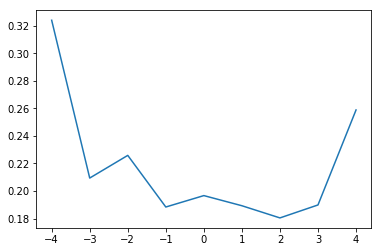

In [445]:
plt.plot(med_sofa_vaso)

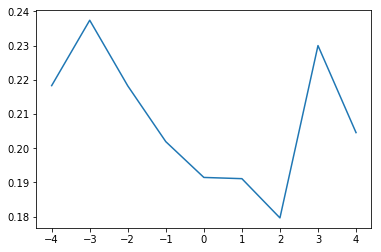

In [446]:
plt.plot(med_sofa_iv)

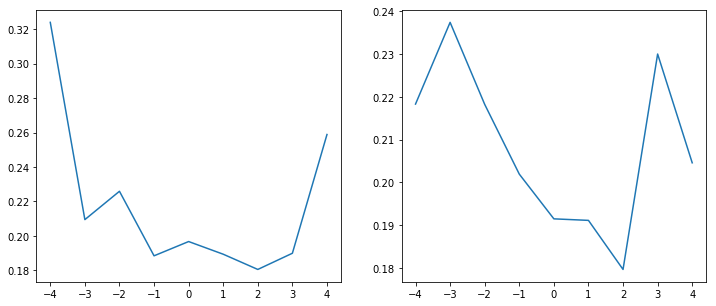

In [449]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(med_sofa_vaso)
ax2.plot(med_sofa_iv)

(array([184118.,      0.,  35554.,    978.,  34712.,   1821.,  34262.,
          2440.,  30812.,   5548.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

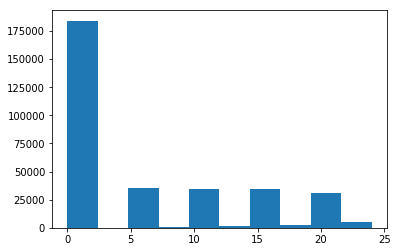

In [361]:
plt.hist(action_df['discrete_action'])

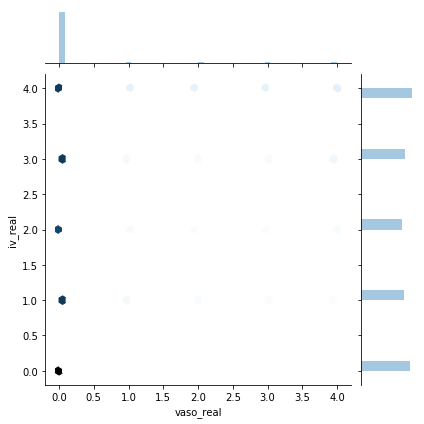

In [182]:
sns.jointplot("vaso_real", "iv_real", data=med_sofa, kind="hex")

In [183]:
plt.hist2d()

TypeError: hist2d() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [ ]:
phys_actions_tuple = [None for i in range(len(phys_actions))]
deeprl2_actions_tuple = [None for i in range(len(phys_actions))]
autoencode_actions_tuple = [None for i in range(len(phys_actions))]                                          

for i in range(len(phys_actions)):
    phys_actions_tuple[i] = inv_action_map[phys_actions[i]]
    deeprl2_actions_tuple[i] = inv_action_map[deeprl2_actions[i]]
    autoencode_actions_tuple[i] = inv_action_map[autoencode_actions[i]]

In [ ]:
phys_actions_tuple = np.array(phys_actions_tuple)
deeprl2_actions_tuple = np.array(deeprl2_actions_tuple)
autoencode_actions_tuple = np.array(autoencode_actions_tuple)

In [ ]:
phys_actions_iv = phys_actions_tuple[:,0]
phys_actions_vaso = phys_actions_tuple[:,1]
hist, x_edges, y_edges = np.histogram2d(phys_actions_iv, phys_actions_vaso, bins=5)

In [ ]:
deeprl2_actions_iv = deeprl2_actions_tuple[:,0]
deeprl2_actions_vaso = deeprl2_actions_tuple[:,1]
hist2, _, _ = np.histogram2d(deeprl2_actions_iv, deeprl2_actions_vaso, bins=5)

In [ ]:
autoencode_actions_iv = autoencode_actions_tuple[:,0]
autoencode_actions_vaso = autoencode_actions_tuple[:,1]
hist3, _, _ = np.histogram2d(autoencode_actions_iv, autoencode_actions_vaso, bins=5)

In [ ]:
x_edges = np.arange(-0.5,5)
y_edges = np.arange(-0.5,5)

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.imshow(np.flipud(hist), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax2.imshow(np.flipud(hist2), cmap="OrRd", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax3.imshow(np.flipud(hist3), cmap="Greens", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

# ax1.grid(color='b', linestyle='-', linewidth=1)
# ax2.grid(color='r', linestyle='-', linewidth=1)
# ax3.grid(color='g', linestyle='-', linewidth=1)

# Major ticks
ax1.set_xticks(np.arange(0, 5, 1));
ax1.set_yticks(np.arange(0, 5, 1));
ax2.set_xticks(np.arange(0, 5, 1));
ax2.set_yticks(np.arange(0, 5, 1));
ax3.set_xticks(np.arange(0, 5, 1));
ax3.set_yticks(np.arange(0, 5, 1));

# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 5, 1));
ax1.set_yticklabels(np.arange(0, 5, 1));
ax2.set_xticklabels(np.arange(0, 5, 1));
ax2.set_yticklabels(np.arange(0, 5, 1));
ax3.set_xticklabels(np.arange(0, 5, 1));
ax3.set_yticklabels(np.arange(0, 5, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax3.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax3.set_yticks(np.arange(-.5, 5, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax2.grid(which='minor', color='r', linestyle='-', linewidth=1)
ax3.grid(which='minor', color='g', linestyle='-', linewidth=1)

im1 = ax1.pcolormesh(x_edges, y_edges, hist, cmap='Blues')
f.colorbar(im1, ax=ax1, label = "Action counts")

im2 = ax2.pcolormesh(x_edges, y_edges, hist2, cmap='OrRd')
f.colorbar(im2, ax=ax2, label = "Action counts")

im3 = ax3.pcolormesh(x_edges, y_edges, hist3, cmap='Greens')
f.colorbar(im3, ax=ax3, label = "Action counts")

ax1.set_ylabel('IV fluid dose')
ax2.set_ylabel('IV fluid dose')
ax3.set_ylabel('IV fluid dose')
ax1.set_xlabel('Vasopressor dose')
ax2.set_xlabel('Vasopressor dose')
ax3.set_xlabel('Vasopressor dose')

ax1.set_title("Physician policy")
ax2.set_title("Q-Network (Sparse Rewards) policy")
ax3.set_title("Q-Network (Shaped Rewards) policy")
plt.tight_layout()

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.hist(phys_actions, bins=50)
ax1.set_title("Physician Actions", fontsize = 10)
ax2.hist(deeprl2_actions, bins=50, color='r')
ax2.set_title("Q-Network Actions", fontsize = 10)
ax3.hist(autoencode_actions, bins=50, color='g')
ax3.set_title("Autoencode Q-Network Actions", fontsize = 10)
f.text(0.5, -0.03, 'Action number', ha='center', fontsize=15)
f.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 15)
# ax2.hist(autoencode_actions, bins=25, color ='g')
plt.tight_layout()


In [ ]:
def make_df_diff(op_actions):
    op_vaso_med = []
    op_iv_med = []
    for action in op_actions:
        iv,vaso = inv_action_map[action]
        op_vaso_med.append(vaso_vals[vaso])
        op_iv_med.append(iv_vals[iv])
    iv_diff = np.array(op_iv_med) - np.array(df_test_orig['input_4hourly_tev'])
    vaso_diff = np.array(op_vaso_med) - np.array(df_test_orig['max_dose_vaso'])
    df_diff = pd.DataFrame()
    df_diff['mort'] = np.array(df_test_orig['died_in_hosp'])
    df_diff['iv_diff'] = iv_diff
    df_diff['vaso_diff'] = vaso_diff
    return df_diff

In [ ]:
from scipy.stats import sem
def make_iv_plot_data(df_diff):
    bin_medians_iv = []
    mort_iv = []
    mort_std_iv= []
    i = -800
    while i <= 900:
        count =df_diff.loc[(df_diff['iv_diff']>i-50) & (df_diff['iv_diff']<i+50)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_iv.append(i)
                mort_iv.append(res)
                mort_std_iv.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 100
    return bin_medians_iv, mort_iv, mort_std_iv

In [ ]:
from scipy.stats import sem
def make_vaso_plot_data(df_diff):
    bin_medians_vaso = []
    mort_vaso= []
    mort_std_vaso= []
    i = -0.6
    while i <= 0.8:
        count =df_diff.loc[(df_diff['vaso_diff']>i-0.05) & (df_diff['vaso_diff']<i+0.05)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_vaso.append(i)
                mort_vaso.append(res)
                mort_std_vaso.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 0.1
    return bin_medians_vaso, mort_vaso, mort_std_vaso

In [ ]:
df_diff_autoencode = make_df_diff(autoencode_actions)
df_diff_deeprl2 = make_df_diff(deeprl2_actions)

In [ ]:
bin_med_iv_auto, mort_iv_auto, mort_std_iv_auto = make_iv_plot_data(df_diff_autoencode)
bin_med_iv_deep, mort_iv_deep, mort_std_iv_deep = make_iv_plot_data(df_diff_deeprl2)
bin_med_vaso_auto, mort_vaso_auto, mort_std_vaso_auto = make_vaso_plot_data(df_diff_autoencode)
bin_med_vaso_deep, mort_vaso_deep, mort_std_vaso_deep = make_vaso_plot_data(df_diff_deeprl2)

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize = (7.5,5))
ax1.plot(bin_med_vaso_deep, sliding_mean(mort_vaso_deep), color='r')
ax1.fill_between(bin_med_vaso_deep, sliding_mean(mort_vaso_deep) - 1*mort_std_vaso_deep,  
                 sliding_mean(mort_vaso_deep) + 1*mort_std_vaso_deep, color='tomato')
ax1.set_title('Q-Network (Sparse Rewards) - Vasopressors')
x_r = [i/10.0 for i in range(-6,10,2)]
y_r = [i/20.0 for i in range(0,20,1)]
ax1.set_xticks(x_r)
ax1.set_yticks(y_r)
ax1.grid()

ax2.plot(bin_med_iv_deep, sliding_mean(mort_iv_deep), color='r')
ax2.fill_between(bin_med_iv_deep, sliding_mean(mort_iv_deep) - 1*mort_std_iv_deep,  
                 sliding_mean(mort_iv_deep) + 1*mort_std_iv_deep, color='tomato')
ax2.set_title('Q-Network (Sparse Rewards) - IV fluids')
x_iv = [i for i in range(-800,900,400)]
ax2.set_xticks(x_iv)
ax2.grid()

ax3.plot(bin_med_vaso_auto, sliding_mean(mort_vaso_auto), color='g')
ax3.fill_between(bin_med_vaso_auto, sliding_mean(mort_vaso_auto) - 1*mort_std_vaso_auto,  
                 sliding_mean(mort_vaso_auto) + 1*mort_std_vaso_auto, color='palegreen')
y_auto = [i/20.0 for i in range(0,21,1)]
ax3.set_yticks(y_auto)
ax3.set_title('Q-Network (Shaped Rewards) - Vasopressors')
ax3.grid()

ax4.plot(bin_med_iv_auto, sliding_mean(mort_iv_auto), color='g')
ax4.fill_between(bin_med_iv_auto, sliding_mean(mort_iv_auto) - 1*mort_std_iv_auto,  
                 sliding_mean(mort_iv_auto) + 1*mort_std_iv_auto, color='palegreen')
ax4.set_title('Q-Network (Shaped Rewards) - IV Fluids')
ax4.grid()
plt.tight_layout()
f.text(0.225, -0.03, 'Difference between optimal and physician vasopressor dose', ha='center', fontsize=10)
f.text(0.775, -0.03, 'Difference between optimal and physician IV dose', ha='center', fontsize=10)
f.text(-0.02, 0.5, 'Observed Mortality', va='center', rotation='vertical', fontsize = 10)